In [469]:
# data analysis and wrangling
import math
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats
from scipy.special import inv_boxcox

# visualization
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

# machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn import svm

In [470]:
data = pd.read_csv('./downloads/KaggleV2-May-2016.csv',encoding = 'utf8')

In [471]:
data["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [472]:
data.shape

(110527, 14)

In [473]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [474]:
a = data.isnull().mean()*100
a.sort_values(ascending = False)

No-show           0.0
SMS_received      0.0
Handcap           0.0
Alcoholism        0.0
Diabetes          0.0
Hipertension      0.0
Scholarship       0.0
Neighbourhood     0.0
Age               0.0
AppointmentDay    0.0
ScheduledDay      0.0
Gender            0.0
AppointmentID     0.0
PatientId         0.0
dtype: float64

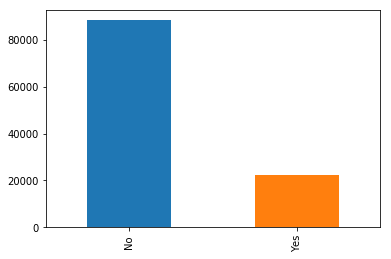

In [475]:
data["No-show"].value_counts().plot("bar")

In [476]:
data  = num_of_visit(data,"PatientId")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [477]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Number_of_visits
0,30845,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2
1,55325,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2
2,15722,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2
3,9018,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2
4,23941,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


In [478]:
data[data["PatientId"] == 30845]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Number_of_visits
0,30845,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2
1157,30845,5639907,F,2016-04-29T09:47:47Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1


In [479]:
dict_counts = dict(data["Neighbourhood"].value_counts())
data["number_of_patients"] = data["Neighbourhood"].replace(dict_counts)

In [480]:
data = data.drop("AppointmentID",1)

In [481]:
data["ScheduledDay"] = data["ScheduledDay"].apply(lambda x: x.split("T")[0])
data["AppointmentDay"] = data["AppointmentDay"].apply(lambda x: x.split("T")[0])

In [482]:
data["ScheduledDay"] = pd.to_datetime(data["ScheduledDay"])
data["AppointmentDay"] = pd.to_datetime(data["AppointmentDay"])

In [483]:
data["sch_to_appt"] = data["AppointmentDay"] - data["ScheduledDay"]
data["sch_to_appt"] = data["sch_to_appt"].apply(lambda x: x.days)

In [484]:
b= []
a = (data[data["sch_to_appt"] <1]["No-show"]).value_counts()
print(a)
b.append(a[0]/(a[0]+a[1])*100)
b

No     36771
Yes     1797
Name: No-show, dtype: int64


[95.34069695084007]

In [485]:
a = (data[(data["sch_to_appt"] >5) & (data["sch_to_appt"] <10)]["No-show"]).value_counts()
print(a)
b.append(a[0]/(a[0]+a[1])*100)
b

No     9460
Yes    3420
Name: No-show, dtype: int64


[95.34069695084007, 73.4472049689441]

In [486]:
a = (data[(data["sch_to_appt"] >10) & (data["sch_to_appt"] < 50)]["No-show"]).value_counts()
print(a)
b.append(a[0]/(a[0]+a[1])*100)
b

No     20934
Yes    10202
Name: No-show, dtype: int64


[95.34069695084007, 73.4472049689441, 67.2340698869476]

In [487]:
a = (data[data["sch_to_appt"] > 50]["No-show"]).value_counts()
print(a)
b.append(a[0]/(a[0]+a[1])*100)
b

No     2179
Yes     949
Name: No-show, dtype: int64


[95.34069695084007, 73.4472049689441, 67.2340698869476, 69.6611253196931]

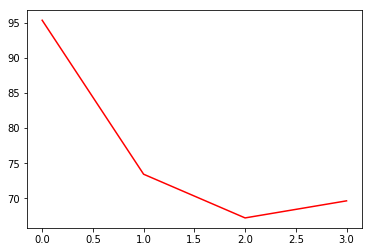

In [488]:
plt.plot(b,"r")

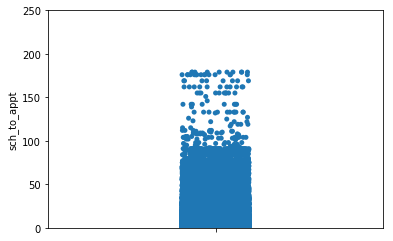

In [489]:
sns.stripplot(data = data, y = 'sch_to_appt', jitter = True)
plt.ylim(0, 250)
plt.show()

In [490]:
data["ScheduledDay"] = data["ScheduledDay"].dt.weekday_name
data["AppointmentDay"] = data["AppointmentDay"].dt.weekday_name

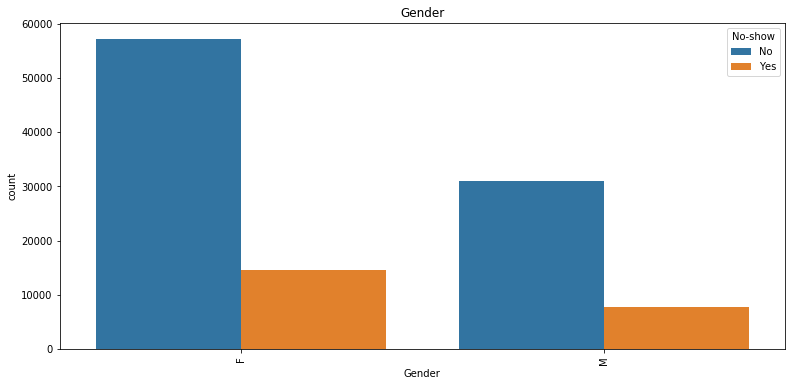

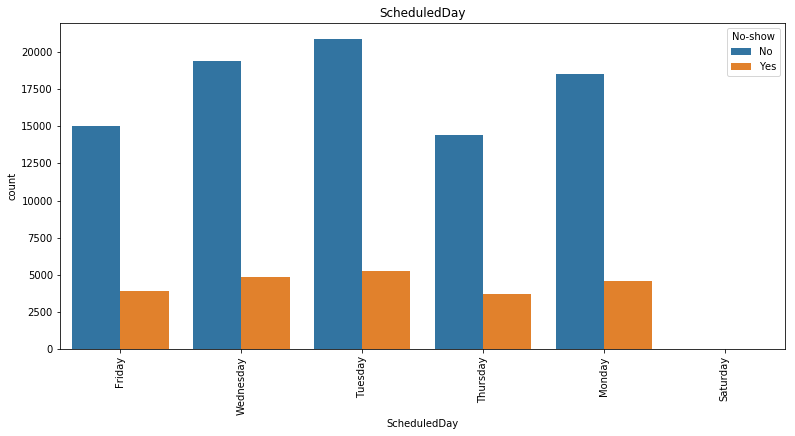

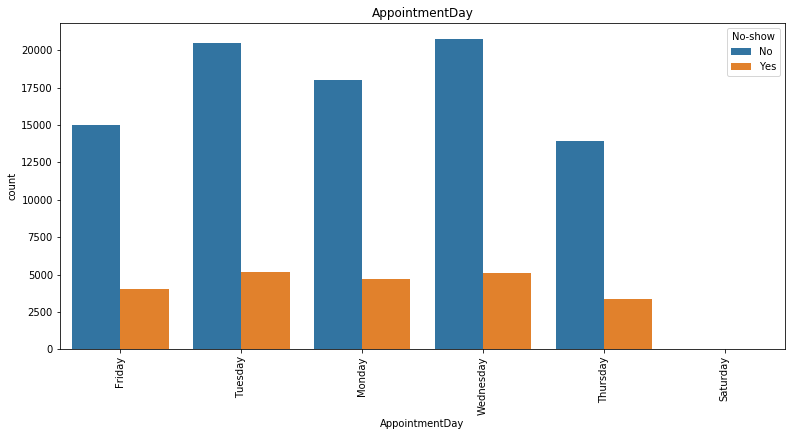

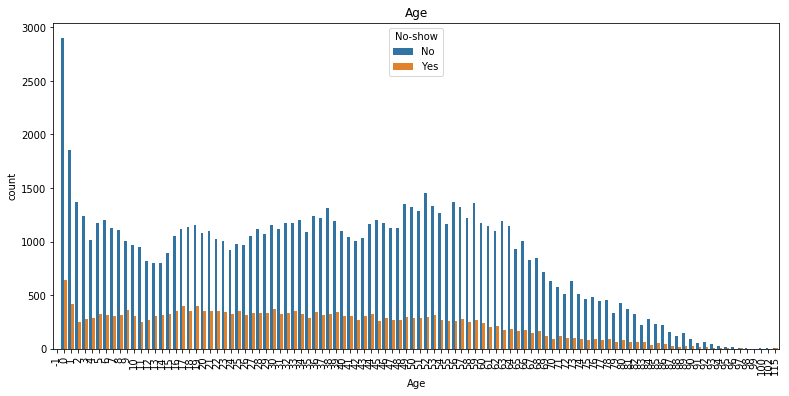

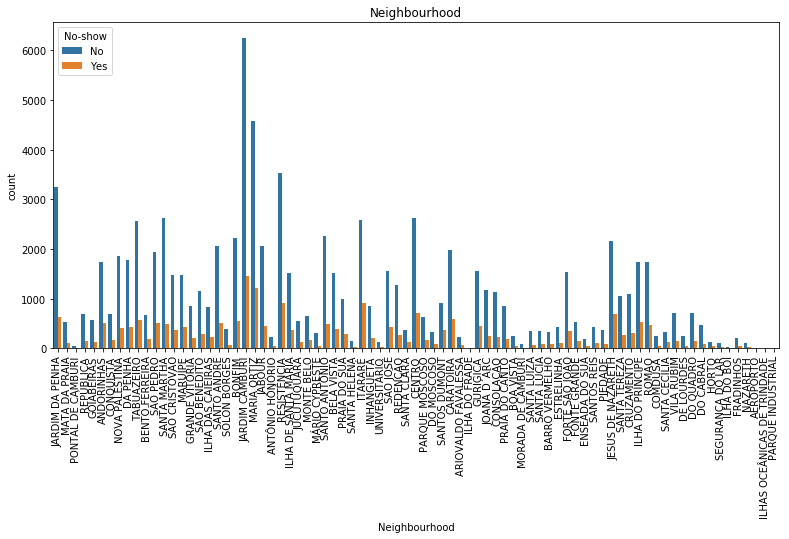

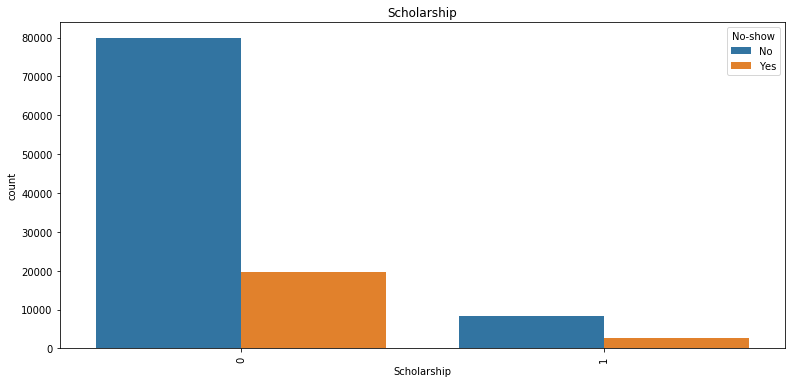

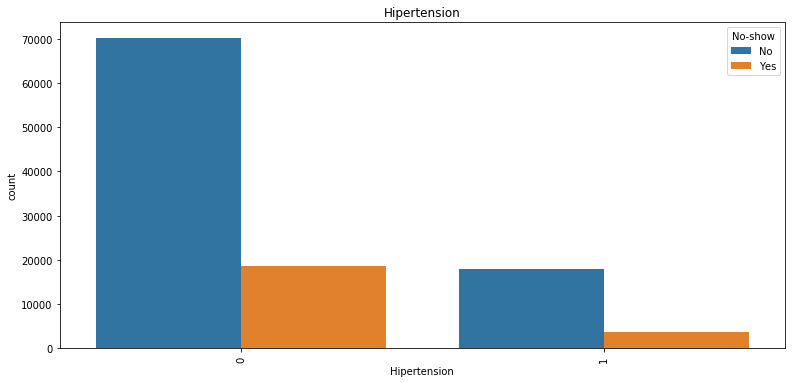

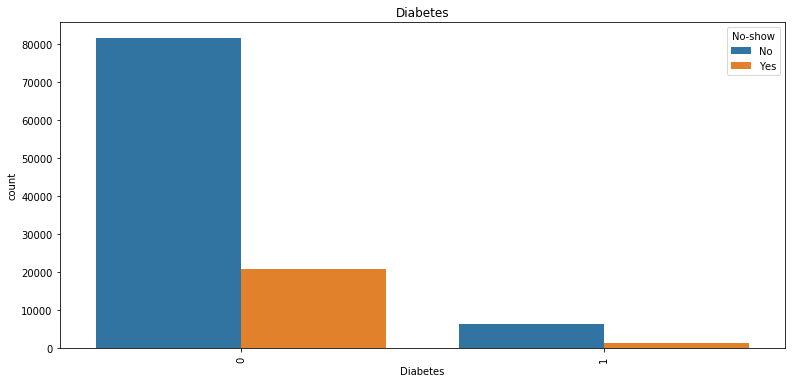

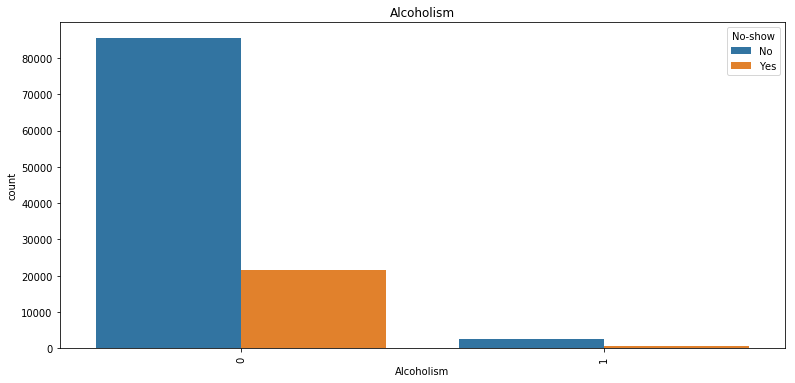

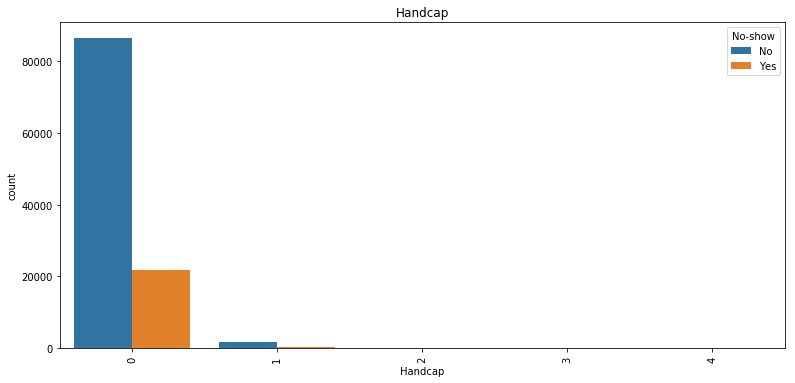

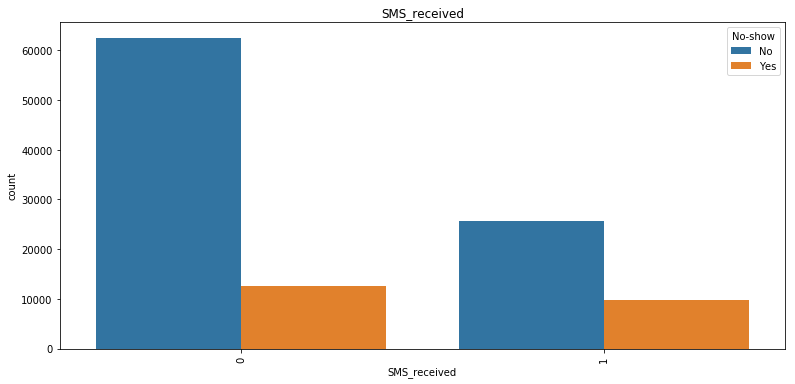

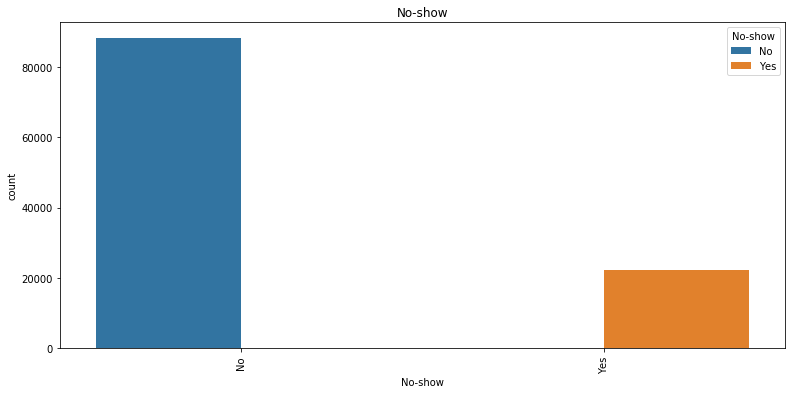

In [491]:
for i in ['Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']:
    count_plot(data,i)

In [492]:
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["No-show"] = le.fit_transform(data["No-show"])

In [493]:
data = data.drop("PatientId",1)

In [494]:
data = data[data["Age"] > -1]

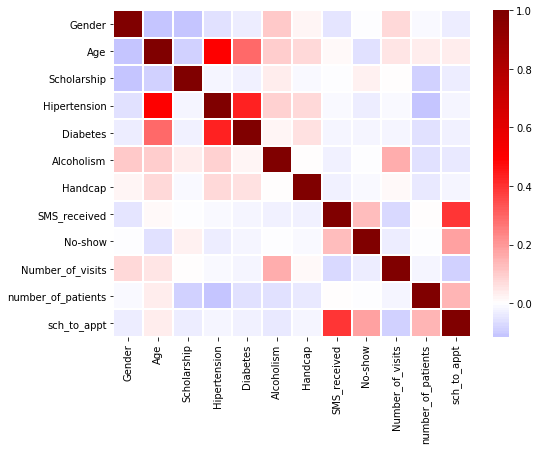

In [495]:
 plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),center = 0,cmap="seismic",linewidths=1)

In [496]:
data = pd.get_dummies(data)

## UNDERSAMPLING

(35856, 105)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


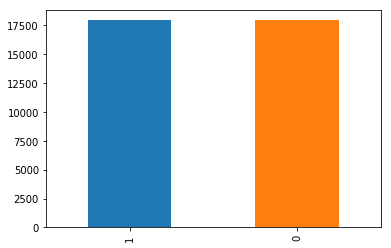

In [497]:
X_train,y_train,X_test,y_test = sample("under",data)

In [498]:
model = modelling(X_train,y_train,X_test,y_test)
model.sort_values(by = "Scores",ascending=False)

KeyboardInterrupt: 

In [362]:
report(X_train,y_train,X_test,y_test)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
-----------------------------------------------------------------------
Model_Accuracy 63.92834524563467


[[11410  6305]
 [ 1669  2722]]


             precision    recall  f1-score   support

          0       0.87      0.64      0.74     17715
          1       0.30      0.62      0.41      4391

avg / total       0.76      0.64      0.67     22106



0    13079
1     9027
dtype: int64


-----------------------------------------------------------------------
GaussianNB(priors=None)
-----------------------------------------------------------------------
Model_Accuracy 49.3666877770741


[

## OVERSAMPLING

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(140984, 105)


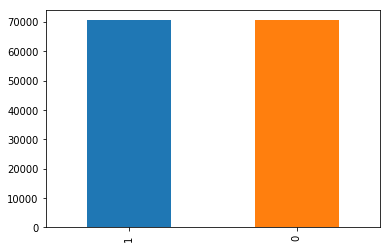

In [400]:
X_train,y_train,X_test,y_test = sample("over",data)

In [364]:
model = modelling(X_train,y_train,X_test,y_test)
model.sort_values(by = "Scores",ascending=False)

,Model,Scores
0,ExtraTreesClassifier,76.933864
2,RandomForestClassifier,76.259839
5,DecisionTreeClassifier,72.401158
6,KNeighborsClassifier,65.534244
3,LogisticRegression,65.520673
4,GradientBoostingClassifier,58.246630
1,GaussianNB,48.864562


In [365]:
report(X_train,y_train,X_test,y_test)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
-----------------------------------------------------------------------
Model_Accuracy 77.236949244549


[[16047  1668]
 [ 3364  1027]]


             precision    recall  f1-score   support

          0       0.83      0.91      0.86     17715
          1       0.38      0.23      0.29      4391

avg / total       0.74      0.77      0.75     22106



0    19411
1     2695
dtype: int64


-----------------------------------------------------------------------
GaussianNB(priors=None)
-----------------------------------------------------------------------
Model_Accuracy 48.864561657468556


[

## OVERSAMPLING WITH SMOTE

In [366]:
X_train,y_train,X_test,y_test = sample("smote",data)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [367]:
model = modelling(X_train,y_train,X_test,y_test)
model.sort_values(by = "Scores",ascending=False)

,Model,Scores
4,GradientBoostingClassifier,80.109473
2,RandomForestClassifier,77.897403
0,ExtraTreesClassifier,76.721252
5,DecisionTreeClassifier,72.903284
3,LogisticRegression,65.136162
6,KNeighborsClassifier,64.751651
1,GaussianNB,44.992310


In [368]:
report(X_train,y_train,X_test,y_test)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
-----------------------------------------------------------------------
Model_Accuracy 76.97005337917308


[[15901  1814]
 [ 3277  1114]]


             precision    recall  f1-score   support

          0       0.83      0.90      0.86     17715
          1       0.38      0.25      0.30      4391

avg / total       0.74      0.77      0.75     22106



0    19178
1     2928
dtype: int64


-----------------------------------------------------------------------
GaussianNB(priors=None)
-----------------------------------------------------------------------
Model_Accuracy 44.99230978015019




# FUNCTIONS

In [277]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

In [467]:
def count_plot(data,column):
    plt.figure(figsize=(13,6))
    plt.xticks(rotation=90)
    ax = sns.countplot(x=data[column],hue=data["No-show"],data=data)
    ax.set_title(column)
    plt.show()

In [276]:
def report(X_train,y_train,X_test,y_test):
    models = [ExtraTreesClassifier(),GaussianNB(),RandomForestClassifier(random_state = 0),LogisticRegression(),
         GradientBoostingClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
    
    for model in models:
        print(model)
        print("-----------------------------------------------------------------------")
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print("Model_Accuracy",model.score(X_test,y_test)*100)
        print('\n')
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        print(classification_report(y_test, y_pred))
        print('\n')
        print((pd.Series(y_pred)).value_counts())
        print('\n')
        print("-----------------------------------------------------------------------")

In [282]:
def modelling(X_train,y_train,X_test,y_test):
    models = [ExtraTreesClassifier(),GaussianNB(),RandomForestClassifier(random_state = 0),LogisticRegression(),
         GradientBoostingClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
    x = []
    for model in models:
        model.fit(X_train,y_train)
        x.append(model.score(X_test,y_test)*100)
    model = pd.DataFrame(["ExtraTreesClassifier","GaussianNB","RandomForestClassifier","LogisticRegression",
         "GradientBoostingClassifier","DecisionTreeClassifier","KNeighborsClassifier"],columns = ["Model"])
    model["Scores"] = x
    return model
    

In [287]:
def sample(option,data):
    train,test = train_test_split(data, train_size=0.8, random_state=42)
    data_class_0 = train[train["No-show"]==0]
    data_class_1 = train[train["No-show"]==1]
    if (option == "under"):
        data_undersample_0 = data_class_0.sample(len(data_class_1))
        data_under = pd.concat([data_class_1,data_undersample_0])
        print(data_under.shape)
        data_under["No-show"].value_counts().plot("bar")
        data = data_under
    elif (option == "over"):
        data_oversample_1 = data_class_1.sample(len(data_class_0),replace=True)
        data_over = pd.concat([data_class_0,data_oversample_1])
        print(data_over.shape)
        data_over["No-show"].value_counts().plot("bar")
        data = data_over
    else:
        os = SMOTE(random_state = 0)
        Y = train["No-show"]
        X = train.drop("No-show",1)
        X_train,y_train = os.fit_sample(X,Y)
        y_test = test["No-show"]
        X_test = test.drop(["No-show"],1)
        return X_train,y_train,X_test,y_test
        
    y_train = data["No-show"]
    X_train = data.drop(["No-show"],1)
    y_test = test["No-show"]
    X_test = test.drop(["No-show"],1)
    return X_train,y_train,X_test,y_test  

In [320]:
def num_of_visit(data,column):
    data[column] = data[column].astype("category")
    data[column] = data[column].cat.codes
    x = [0] * len(data[column])
    data1 = data[::-1]
    y = []
    for i in data1[column]:
        x[i] = x[i] + 1
        y.append(x[i])
    data1["Number_of_visits"] = y
    data = data1[::-1]
    return data

In [ ]:
def param_grid(key):
    
    if (key == DecisionTreeClassifier):
        return ({'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7], 
          'min_samples_leaf':[1,2,3,4,5,6],
          'random_state':[123]})
    
    
    elif (key == RandomForestClassifier): 
        return({'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]})
    
    
    elif (key == svm):   
        return({'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']})
    
    
    elif (key == KNeighborsClassifier):
        return({'n_neighbors':[5,6,7],
          'leaf_size':[1,2,3],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree']})
    
    
    elif (key == GradientBoostingClassifier): 
        return({'loss' : ["deviance", "exponential"],
            'learning_rate' : [0.01,0.1,1],
            'min_samples_split': [3, 5, 10], 
            'n_estimators' : [100, 200],
            'max_depth': [3, 5, 15],
            'max_features': [3, 5]})
    
    
    
    

In [515]:
def grid_search(model,param_grid,X_train,y_train,X_test,y_test):
    
    random_search = RandomizedSearchCV(model,param_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = 2)
    random_search.fit(X_train, y_train)

    # make the predictions
    y_pred = random_search.predict(X_test)

    print('Best params')
    print(random_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix')
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return random_search,y_pred

In [516]:
from sklearn.model_selection import RandomizedSearchCV

In [517]:
grid_search,y_pred = grid_search(GradientBoostingClassifier(),param_grid(GradientBoostingClassifier),X_train,y_train,X_test,y_test)

Best params
{'n_estimators': 200, 'min_samples_split': 10, 'max_features': 5, 'max_depth': 5, 'loss': 'deviance', 'learning_rate': 0.1}

Confusion matrix
     pred_neg  pred_pos
neg      9188      8527
pos       786      3605


In [513]:
print("-----------------------------------------------------------------------")
print("Model_Accuracy",grid_search.score(X_test,y_test)*100)
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
print('\n')
print((pd.Series(y_pred)).value_counts())
print('\n')
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Model_Accuracy 59.06993576404596


[[9520 8195]
 [ 853 3538]]


             precision    recall  f1-score   support

          0       0.92      0.54      0.68     17715
          1       0.30      0.81      0.44      4391

avg / total       0.80      0.59      0.63     22106



1    11733
0    10373
dtype: int64


-----------------------------------------------------------------------


In [ ]:
def plot_roc_curve(y_test,y_pred):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    
    fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred)
    print(auc(fpr, tpr))
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

In [ ]:
def plot_precision_recall_vs_threshold(y_test,y_pred):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    p, r, thresholds = precision_recall_curve(y_test, y_pred)
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')